In [1]:
###########################
#
#  Assignment 3: Graph Visualization
#     - load a graph database
#     - create a basic analysis of your graph
#.    - visualize graph in Graph Visualization
#
###########################

In [2]:
###########################
#
#  Packages Used
#    - python 3.6.13 
#    - networkx 2.1 
#    - matplotlib 2.0.2 
#    - nltk 3.2.5 
#    - numpy 1.13.3 
#    - pandas 0.22.0 
#    - pygraphviz 1.3 
#    - scipy 1.0.1 
#
###########################

In [3]:
###########################
#
#  Import
#
###########################

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx import algorithms 
import itertools 

from neo4j import GraphDatabase
import nxneo4j as neo


In [5]:
###########################
#
#  Load Graph from file
#
###########################

In [6]:
Data = open('data/facebook_combined_s.txt', "r")
Graphtype = nx.Graph()

In [7]:
g = nx.parse_edgelist(Data, delimiter=' ', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))

In [8]:
type(g)

networkx.classes.graph.Graph

In [9]:
###########################
#
#  draw graph
#
###########################

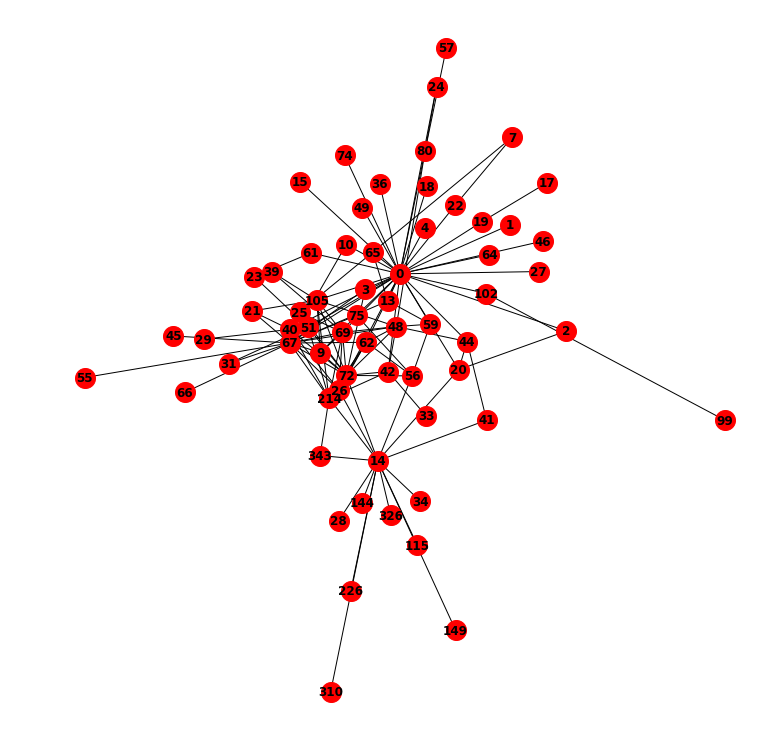

In [10]:
plt.figure(figsize=(10,10))
nx.draw(g, with_labels=True, node_size=400, font_color='black', font_weight='bold')

In [11]:
###########################
#
#  basic analysis
#
###########################

In [12]:
#####      diameter      #####
algorithms.distance_measures.diameter(g)

5

In [13]:
#####      k_nearest_neighbors      #####
algorithms.k_nearest_neighbors(g)

{33: 4.090909090909091,
 1: 20.307692307692307,
 2: 14.076923076923077,
 3: 17.333333333333332,
 4: 13.071428571428571,
 8: 11.875,
 5: 11.533333333333333,
 6: 12.083333333333334,
 7: 12.142857142857142,
 19: 6.947368421052632,
 10: 10.65,
 16: 9.8125,
 9: 9.61111111111111,
 15: 3.533333333333333}

In [14]:
#####      average neighbor      #####
algorithms.average_neighbor_degree(g,44,310)

{0: 4.090909090909091,
 1: 33.0,
 2: 18.5,
 3: 22.666666666666668,
 4: 33.0,
 10: 26.0,
 13: 15.0,
 15: 33.0,
 18: 33.0,
 19: 17.0,
 20: 13.5,
 22: 17.5,
 24: 18.5,
 27: 33.0,
 36: 33.0,
 40: 11.875,
 42: 13.8,
 44: 12.0,
 46: 33.0,
 49: 33.0,
 51: 11.666666666666666,
 59: 12.75,
 61: 17.5,
 62: 14.0,
 64: 33.0,
 65: 11.5,
 67: 6.947368421052632,
 69: 11.6,
 72: 9.8125,
 74: 33.0,
 75: 15.5,
 80: 11.25,
 102: 17.0,
 105: 10.555555555555555,
 7: 3.0,
 9: 11.6,
 14: 3.533333333333333,
 17: 2.0,
 21: 12.0,
 23: 4.0,
 25: 10.285714285714286,
 26: 12.5,
 29: 8.0,
 31: 12.5,
 33: 5.0,
 39: 9.5,
 41: 9.5,
 45: 19.0,
 48: 8.666666666666666,
 55: 19.0,
 56: 9.2,
 57: 4.0,
 66: 19.0,
 99: 2.0,
 28: 15.0,
 115: 15.0,
 34: 15.0,
 144: 15.0,
 149: 15.0,
 214: 9.7,
 226: 15.0,
 310: 15.0,
 326: 15.0,
 343: 12.5}

In [15]:
###########################
#
#  connect to neo4j using networkx
#
###########################

In [16]:
driver = GraphDatabase.driver(uri="neo4j://localhost:7687",auth=("neo4j","****"))

In [17]:
g_neo = neo.Graph(driver)

In [18]:
g_neo.delete_all()

In [19]:
g_neo.add_nodes_from(list(g.nodes))
g_neo.add_edges_from(list(g.edges))

In [20]:
driver.close()